# Exploratory Data Analysis (EDA) for Predicting Recovery Time

In this assignment, I'll do an exploratory data analysis (EDA) to better understand our dataset and prepare for building a predictive model for recovery time. 

### Project Objective
The primary aim of this project is to develop a predictive model that estimates the recovery time (in days) for patients based on their blood flow MRI data and demographic/medical features. By achieving this, we aim to provide valuable insights into patient recovery and improve medical decision-making processes.

### Problem Statement
The key question driving this project is: Can we accurately predict recovery time based on blood flow MRI data, demographic features (e.g., age, gender), and medical history (e.g., history of concussion)?
This project involves leveraging a deep learning approach to analyze blood flow MRI images and other structured data, enabling the development of a robust predictive tool.


## Dataset Overview
Our dataset consists of two main files:
- **`clean_output.csv`**: This file contains patient metadata, including:
  - Unique identifiers (e.g., `ID`, `subject_id`, `file_name`)
  - Demographic information (e.g., `age`, `sex`)
  - Medical history (e.g., history of concussion, denoted by `HOC`)
  - Timing features (e.g., `dInj` for days since injury and `dRecov` for recovery time)
  - Summary statistics of MRI scans (e.g., `mean_intensity`, `std_intensity`, `max_intensity`, `min_intensity`)
  - Original MRI data shape

- **`cleaned_output.h5`**: This HDF5 file stores the preprocessed MRI scan data as NumPy arrays, which are indexed by `subject_id`.

## Goals of the EDA
The aim of this EDA is to:
1. **Understand the Data Structure:** Review and summarize the different features available in both metadata and MRI data.
2. **Visualize Data Distributions:** Examine the distributions of key variables (e.g., recovery time, age, and MRI intensity statistics) and identify any skewness or outliers.
3. **Investigate Relationships:** Explore correlations and patterns between recovery time and other variables, such as demographic features, medical history, and imaging metrics.
4. **Dimensionality Reduction:** Apply techniques like PCA to handle the high dimensionality of MRI data, which will help in visualizing and understanding underlying patterns.
5. **Detect and Address Outliers:** Identify potential anomalies or extreme values in the dataset that could affect model performance.




In [14]:
%%capture
pip install matplotlib


In [15]:
%%capture
pip install seaborn

In [ ]:
%%capture
pip install plotly.express

In [ ]:
%%capture
pip install ipywidgets

## Understand The Data

Frist, we want to do a background search to understuand what recovery time (target variable) means clinically.

Clinically, recovery time refers to the duration it takes for a patient to return to a predefined level of health or function after an injury, illness, or medical intervention. This period is typically measured from the onset of the injury or treatment until the patient meets specific clinical criteria for recovery. 

In this case, in the dataset, target variable is `dRecov`, which represents the recovery time in days.

Let's first start with a concise summary of the data

In [61]:
import pandas as pd

# Load dataset
df = pd.read_csv("cleaned_output.csv")

# Display basic info
print(df.info())
print(df.describe())  # Summary statistics
print(df.isnull().sum())  # Missing values count


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              93 non-null     int64  
 1   age             93 non-null     int64  
 2   sex             93 non-null     int64  
 3   HOC             93 non-null     int64  
 4   dInj            93 non-null     float64
 5   dRecov          93 non-null     float64
 6   subject_id      93 non-null     int64  
 7   file_name       93 non-null     object 
 8   mean_intensity  93 non-null     float64
 9   std_intensity   93 non-null     float64
 10  max_intensity   93 non-null     float64
 11  min_intensity   93 non-null     float64
 12  shape           93 non-null     object 
dtypes: float64(6), int64(5), object(2)
memory usage: 9.6+ KB
None
               ID        age        sex        HOC       dInj      dRecov  \
count   93.000000  93.000000  93.000000  93.000000  93.000000   93.000000   
m

Based on the output, I observed that:

- **Dataset Size and Completeness:**  
  The DataFrame contains 93 entries and 13 columns, with no missing values, which indicates a complete dataset.

- **Demographic and Clinical Features:**  
  - **Age:** The average age is around 20 years with a small spread (std ≈ 2), suggesting a relatively homogeneous age group.
  - **Sex & History of Concussion (HOC):** Both features have mean values close to 0.5, implying a balanced distribution between the two categories (e.g., nearly equal numbers of males/females and yes/no for concussion history).

- **Recovery and Injury Timing:**  
  - **Days Since Injury (dInj):** On average, MRIs were taken about 4.65 days post-injury.
  - **Recovery Time (dRecov):** The mean recovery time is approximately 54 days, but with a high standard deviation (≈ 58 days), indicating considerable variability in patient recovery durations.

- **Intensity Metrics**
  -  mean_intensity, std_intensity, max_intensity, min_intensity and shape are all extracted from the MRI image. filenames is the name of the MRI image

## Formulate Initial Questions
- **Descriptive Questions:**  
  - What are the distributions of age, sex, and other demographic features?
  - How is recovery time distributed? Are there skewness or outliers?

- **Relationship Questions:**  
  - How do demographic or clinical features relate to recovery time?
  - What are the correlations between MRI summary statistics (mean, std, etc.) and recovery time?

- **Imaging-Specific Questions:**  
  - Do particular regions (or slices) in the MRI scans show patterns linked to recovery?
  - How does the high-dimensional nature of the MRI data relate to patient outcomes?

### What are the distributions of age, sex, and other demographic features? How is recovery time distributed?

Let's start by plotting the revocery time first

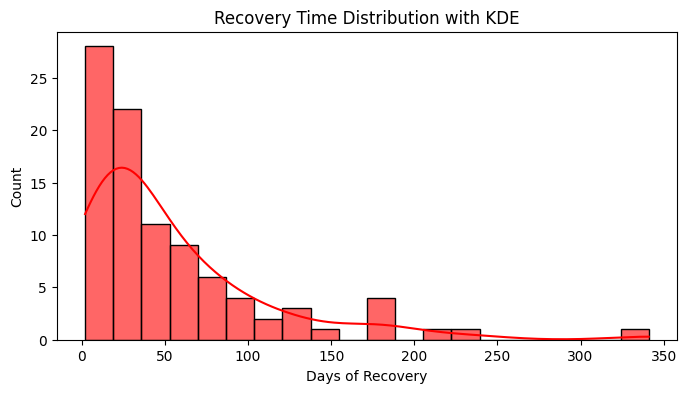

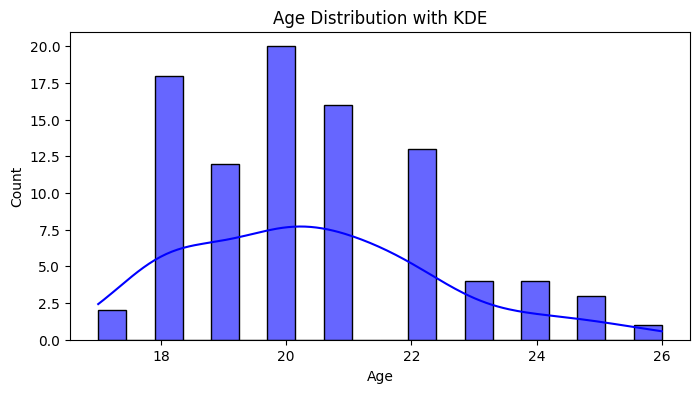

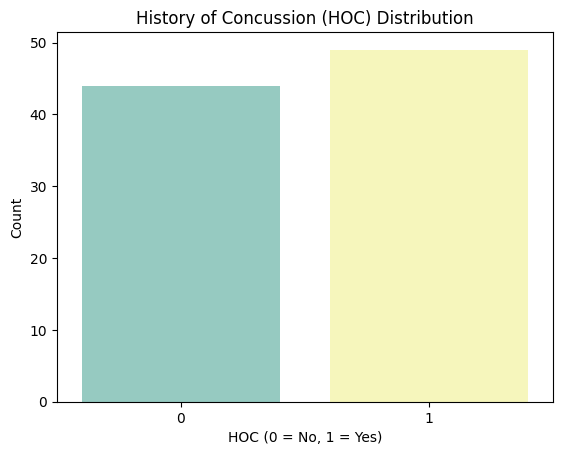

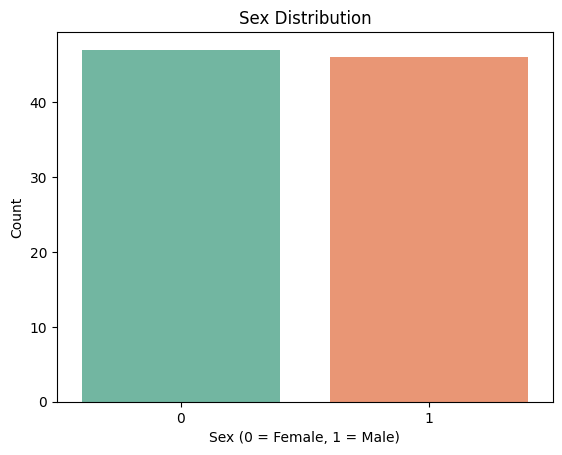

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Recovery Time Distribution with KDE
plt.figure(figsize=(8, 4))
sns.histplot(df['dRecov'], bins=20, kde=True, color='red', alpha=0.6)
plt.title("Recovery Time Distribution with KDE")
plt.xlabel("Days of Recovery")
plt.ylabel("Count")
plt.show()

# Plot Age Distribution with KDE
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=20, kde=True, color='blue', alpha=0.6)
plt.title("Age Distribution with KDE")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# For History of Concussion (HOC)
sns.countplot(x='HOC', data=df, hue='HOC', palette='Set3', legend=False)
plt.title("History of Concussion (HOC) Distribution")
plt.xlabel("HOC (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# For Sex
sns.countplot(x='sex', data=df, hue='sex', palette='Set2', legend=False)
plt.title("Sex Distribution")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()





based on the plots, I observed that:

1. For Recovery time distribution, the distribution is **right-skewed**, indicating that most patients recover within the lower range (under ~100 days), while a smaller subset experiences much longer recovery times extending beyond 300 days. This skew suggests potential outliers and a wide variance in patient recovery durations, which may need special consideration in modeling (e.g., log-transformation or robust loss functions). And we can check the outliers by using box plot to identify potential outliers.

2. For age distribution: The dataset is primarily composed of individuals in their late teens to mid-twenties, with a **peak around 19–20 years old**. The relatively narrow age range implies a somewhat homogeneous demographic, which could reduce the variability contributed by age in the predictive model. We can include the limitation in discussion.

3. For sex and HOC distribution, the bar chart shows a **roughly balanced** distribution, having balanced categories can be advantageous for modeling, as it helps avoid bias toward one sex over the other and class imbalange in HOC.



### How is recovery time distributed? Are there skewness or outliers?

Let's check it by using a box plot

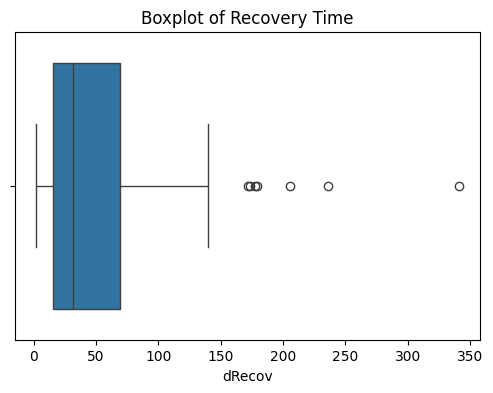

In [19]:
# Boxplot to check outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df['dRecov'])
plt.title("Boxplot of Recovery Time")
plt.show()

This further confirms our thought, the median appears to lie within the lower range, indicating that a majority of patients recover relatively quickly. Several outliers extend well beyond 100 days, some approaching 300+ days, suggesting that a subset of patients have significantly prolonged recovery times.

So in model fitting, we can either apply a log or Box-Cox transformation to dRecov to reduce skew and improve model performance. And using MAE (Mean Absolute Error) or Huber loss instead of MSE if outliers heavily influence the model.

### How do demographic or clinical features relate to recovery time?

Let's compare days of recovery with age, sex, HOC

Let's use box plot since it identifies potential outliers and is good for group comparison. Also, by plotting recovery time against each age (same for sex HOC), we can observe whether younger or older individuals tend to recover faster or more slowly (similarly for other variables).

C:\Users\Intel\AppData\Local\Temp\ipykernel_42188\833221722.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["age"], y=df["dRecov"], palette="coolwarm")
C:\Users\Intel\AppData\Local\Temp\ipykernel_42188\833221722.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["HOC"], y=df["dRecov"], palette="viridis")
C:\Users\Intel\AppData\Local\Temp\ipykernel_42188\833221722.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["sex"], y=df["dRecov"], palette="magma")


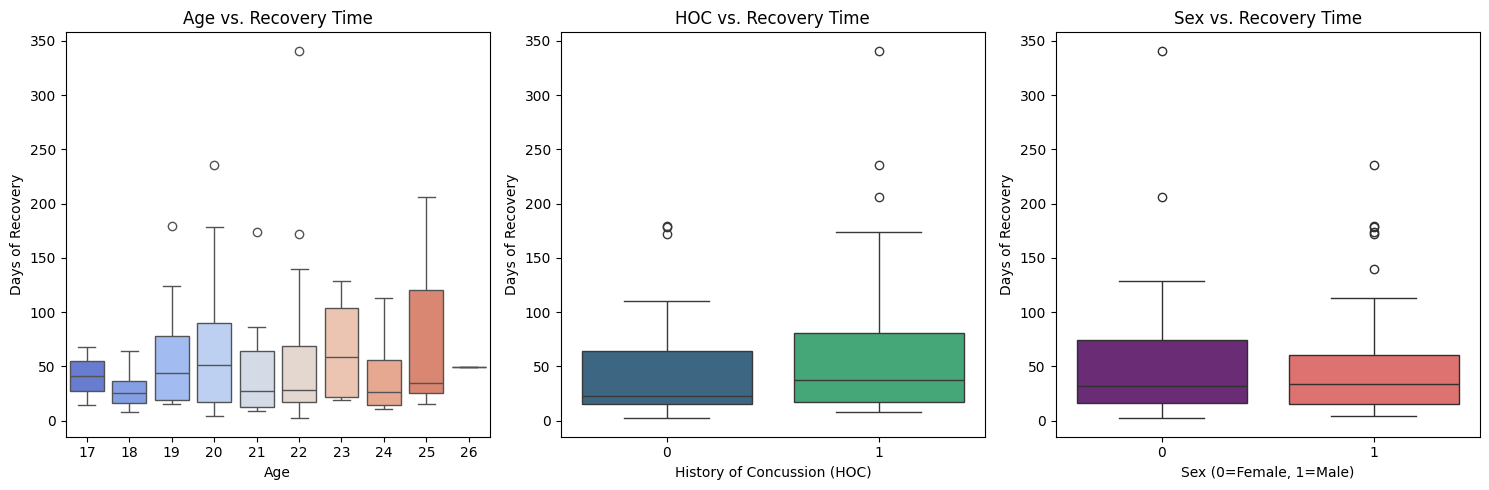

In [24]:
# Set figure size for all plots
plt.figure(figsize=(15, 5))

# Box Plot: Age vs. Recovery Time
plt.subplot(1, 3, 1)
sns.boxplot(x=df["age"], y=df["dRecov"], palette="coolwarm")
plt.xlabel("Age")
plt.ylabel("Days of Recovery")
plt.title("Age vs. Recovery Time")

# Box Plot: HOC (History of Concussion) vs. Recovery Time
plt.subplot(1, 3, 2)
sns.boxplot(x=df["HOC"], y=df["dRecov"], palette="viridis")
plt.xlabel("History of Concussion (HOC)")
plt.ylabel("Days of Recovery")
plt.title("HOC vs. Recovery Time")

# Box Plot: Sex vs. Recovery Time
plt.subplot(1, 3, 3)
sns.boxplot(x=df["sex"], y=df["dRecov"], palette="magma")
plt.xlabel("Sex (0=Female, 1=Male)")
plt.ylabel("Days of Recovery")
plt.title("Sex vs. Recovery Time")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

1. **Age vs. Recovery Time**   
   - Most age groups cluster within lower recovery ranges, but there are several outliers that extend well above 100 days.  
   - There isn’t a strong or obvious trend that recovery time strictly increases or decreases with age, but some age groups do appear to have more variability than others.

2. **HOC (History of Concussion) vs. Recovery Time**  
   - Patients with a history of concussion (HOC = 1) show a slightly higher median recovery time than those without (HOC = 0).  
   - Outliers exist in both groups  
   - This suggests that concussion history may contribute to longer recovery, but it’s not the sole factor (given the presence of long-recovery outliers in both groups).

3. **Sex vs. Recovery Time**  
   - The medians for female (0) and male (1) patients appear relatively close, indicating no drastic difference in central tendency.  
   - Both groups have outliers, suggesting that individual patient factors beyond sex also play a role in extended recovery times.

Overall:
- **Significant individual variation** in recovery time within each category (age, HOC, sex).  
- **Potential influence** of HOC on prolonged recovery, though other factors clearly contribute.  
- **No strong pattern** by sex alone, at least from a high-level view of medians.  


### What are the correlation of age, sex, and other demographic features?

Let's do a heatmap and pair plot to view the correlation. Why are we asking this question? Because understanding the correlation among features is crucial in exploratory data analysis for several reasons:

- Identify Redundancy (Multicollinearity): If two or more features are highly correlated with each other (e.g., age and some other demographic factor), they may be providing overlapping information. This can lead to inflated variance in model coefficients or reduce model interpretability.

- Feature Selection: Correlation with the target variable (e.g., recovery time) can help highlight which features might be more informative for predicting outcomes. Features that show little or no correlation with the target may not add much predictive power.

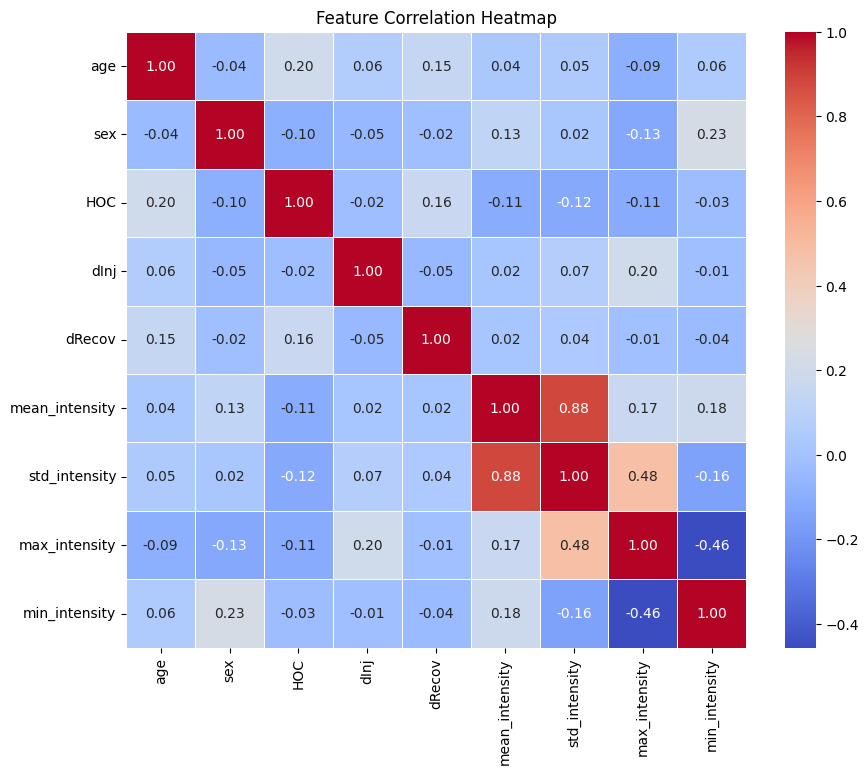

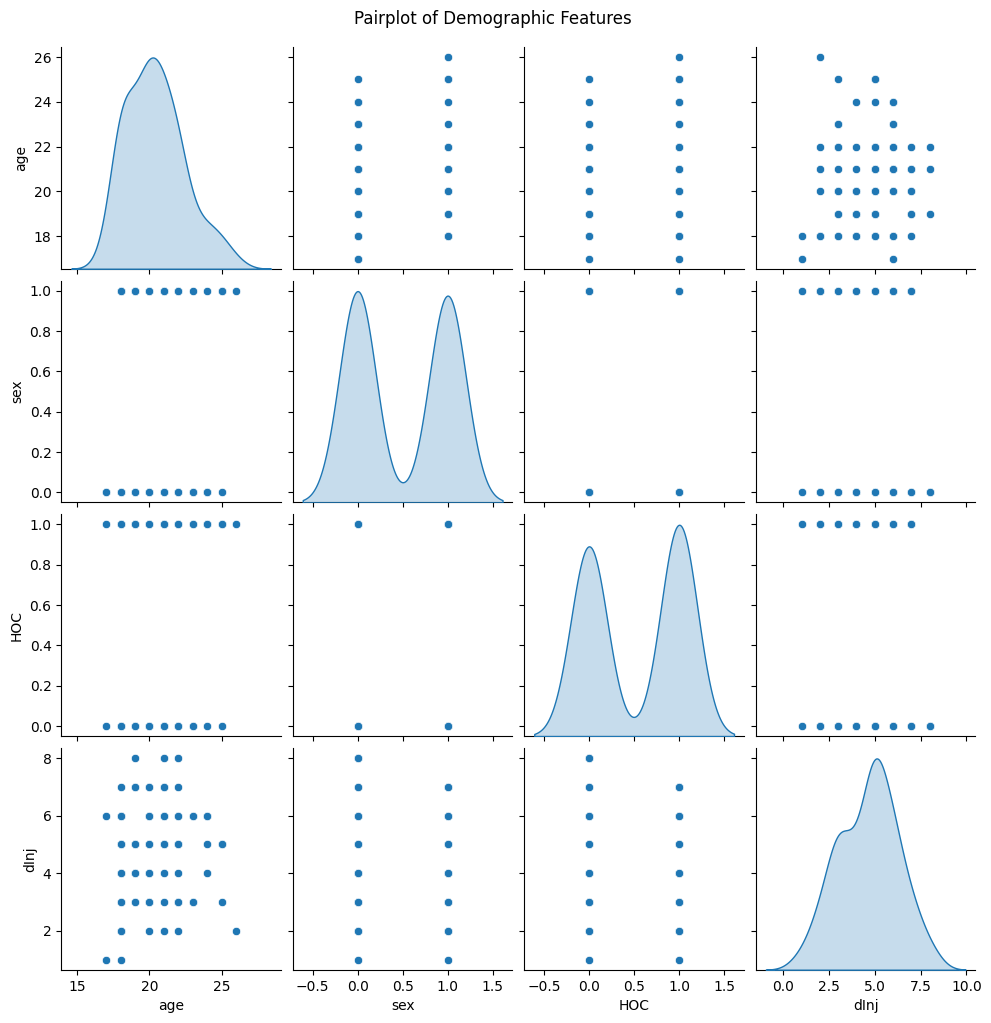

In [ ]:
numeric_df = df.drop(columns=["ID", "subject_id", "file_name", "shape"])  # Exclude non-numeric data

numeric_df.columns = numeric_df.columns.astype(str)

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot Heatmap of Feature Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#Pairplot
sns.pairplot(df[['age', 'sex', 'HOC', 'dInj']], diag_kind='kde')
plt.suptitle("Pairplot of Demographic Features", y=1.02)
plt.show()


1. **Correlations With Recovery Time (`dRecov`)**  
   - sex, dInj show **very low** correlation with `dRecov`, and age and HOC show relatively high correlation with dRecov compare to sex and dinj.  
   - But overall the intensity metrics (mean, std, max, min) and demographic feature exhibit only slight correlations with `dRecov` (mostly under ±0.1).

2. **MRI Intensity Metrics**  
   - **`mean_intensity` and `std_intensity`** are strongly correlated (~0.88).  
   - **`std_intensity` and `max_intensity`** also have a high correlation (~0.80).  
   - This is expected, because those 2 values are extracted from the same h5 file 

## Visualizing MRI Image

 HDF5 container that stores the preprocessed MRI data for each subject as NumPy arrays, keyed by subject_id. This format is more efficient and organized for handling large, high-dimensional datasets like MRI scans compared to traditional CSV or multiple image files.

### Black and White version


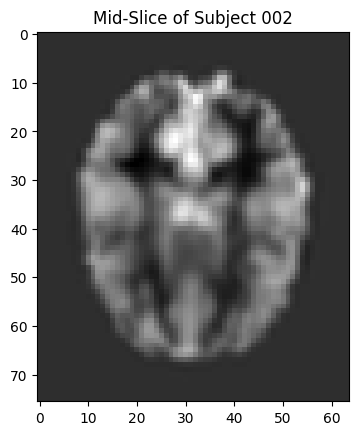

In [33]:
import h5py
import numpy as np

# Load MRI data
with h5py.File("cleaned_output.h5", "r") as h5file:
    subject_ids = list(h5file.keys())
    example_mri = h5file[subject_ids[0]]['image_array'][:]

# Plot an example MRI slice
plt.imshow(example_mri[example_mri.shape[0] // 2], cmap='gray')
plt.title(f"Mid-Slice of Subject {subject_ids[0]}")
plt.show()


### Colored Version

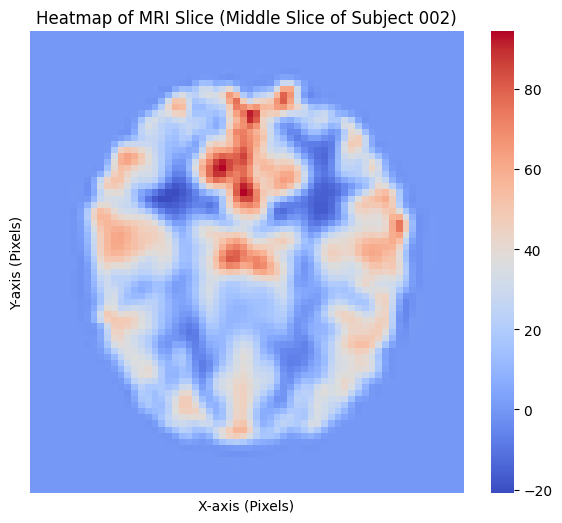

In [ ]:
subject_id = subject_ids[0]  # Pick first subject in dataset

# Extract the middle brain slice (axial view)
mid_slice = example_mri.shape[0] // 2
slice_data = example_mri[mid_slice, :, :]  # Take middle slice

# Plot Heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(slice_data, cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title(f"Heatmap of MRI Slice (Middle Slice of Subject {subject_id})")
plt.xlabel("X-axis (Pixels)")
plt.ylabel("Y-axis (Pixels)")
plt.show()

### Do particular regions (or slices) in the MRI scans show patterns?

To do so, we can plot histograms of voxel intensities for individual scans to understand the intensity distribution. This is useful for checking normalization and contrast.

Also, we can calculate mean, median, standard deviation, and percentiles of voxel intensities. These can be compared across subjects to detect outliers or systematic differences

Let's use the approach of slice-based analysis (or slice-wise analysis). Instead of analyzing the entire 3D volume at once, we look at just one slice to quickly visualize and understand the intensity distribution or detect anomalies in that plane and compare that with the entire MRI volume. When dealing with 3D MRI data, “1 slice” refers to a 2D cross-section of the 3D volume. In practical terms, an MRI volume typically has dimensions (height,width,depth)

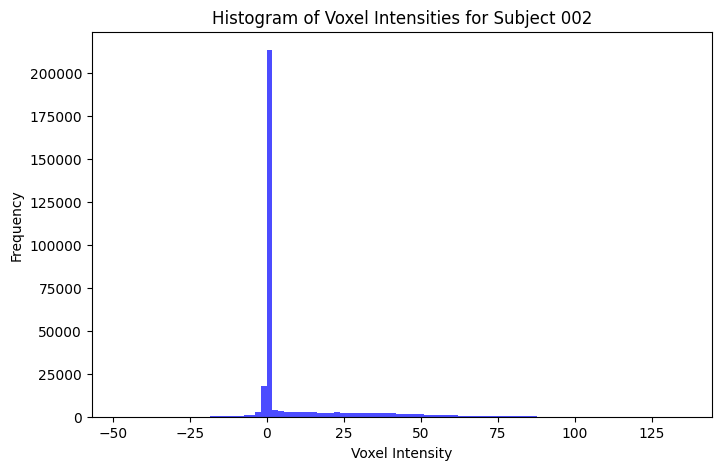

Summary Statistics for Subject 002:
Mean Intensity: 6.8822246
Median Intensity: 2.248108e-16
Standard Deviation: 16.220795
25th, 50th, 75th Percentiles: [-1.94465426e-08  2.24810790e-16  4.64297548e-01]


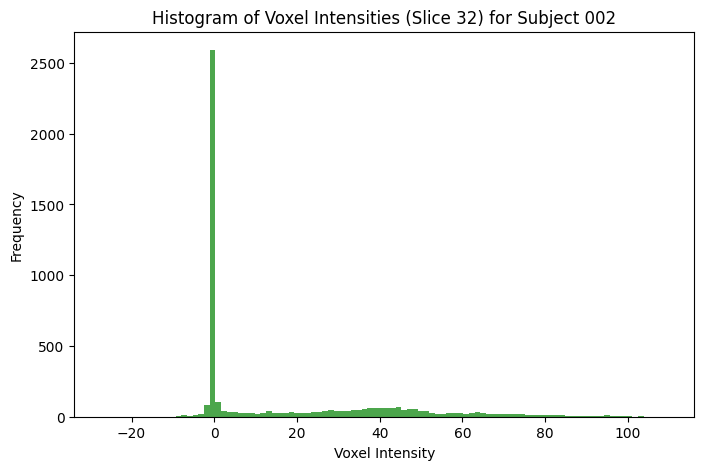


Summary Statistics for Slice 32 of Subject 002:
Mean Intensity: 16.9241
Median Intensity: 0.0031651813
Standard Deviation: 24.554478
25th, 50th, 75th Percentiles: [-2.10167729e-14  3.16518114e-03  3.54325218e+01]


In [ ]:
# 1. Analyze the entire MRI volume
flattened_data = example_mri.flatten()

# Plot histogram for the entire volume
plt.figure(figsize=(8, 5))
plt.hist(flattened_data, bins=100, color='blue', alpha=0.7)
plt.title(f"Histogram of Voxel Intensities for Subject {subject_ids[0]}")
plt.xlabel("Voxel Intensity")
plt.ylabel("Frequency")
plt.show()

# Calculate summary statistics for the entire volume
mean_intensity = np.mean(flattened_data)
median_intensity = np.median(flattened_data)
std_intensity = np.std(flattened_data)
percentiles = np.percentile(flattened_data, [25, 50, 75])

print(f"Summary Statistics for Subject {subject_ids[0]}:")
print("Mean Intensity:", mean_intensity)
print("Median Intensity:", median_intensity)
print("Standard Deviation:", std_intensity)
print("25th, 50th, 75th Percentiles:", percentiles)

#  2: Analyze a single slice (e.g., the middle slice along the third dimension)
slice_index = example_mri.shape[2] // 2
slice_data = example_mri[:, :, slice_index]

plt.figure(figsize=(8, 5))
plt.hist(slice_data.flatten(), bins=100, color='green', alpha=0.7)
plt.title(f"Histogram of Voxel Intensities (Slice {slice_index}) for Subject {subject_ids[0]}")
plt.xlabel("Voxel Intensity")
plt.ylabel("Frequency")
plt.show()

# Calculate summary statistics for the selected slice
mean_slice = np.mean(slice_data)
median_slice = np.median(slice_data)
std_slice = np.std(slice_data)
percentiles_slice = np.percentile(slice_data, [25, 50, 75])

print(f"\nSummary Statistics for Slice {slice_index} of Subject {subject_ids[0]}:")
print("Mean Intensity:", mean_slice)
print("Median Intensity:", median_slice)
print("Standard Deviation:", std_slice)
print("25th, 50th, 75th Percentiles:", percentiles_slice)

Most voxels have intensities very close to zero (or are exactly zero), creating a tall peak in the histogram. This often indicates background or masked Areas, ie large portions of the volume might be outside the brain or masked out during preprocessing.

The median is effectively zero, while the mean is higher (about 6.88 for the entire volume, 16.92 for slice 32). This discrepancy implies a skewed distribution with a few regions or voxels having substantially higher intensities, which raises the mean.
Most voxels remain at or near zero intensity, but a subset with higher values pulls the average upward. 

The entire volume’s mean is lower than the single slice’s mean. One slice might capture a particular anatomical structure or region with higher intensities, thereby elevating the slice’s average.

To resolve this, we can apply brain mask. If not, large regions outside the brain can inflate the zero-intensity count.

### Apply Brain Mask

Let's apply a brain mask from brain_mask.h5 to the MRI volume

In [50]:
import h5py
import numpy as np

# Function to overlay a mask with MRI data
def overlay_mask(mri_data, mask_data):
    # Extract only the voxels inside the mask (mask == 1)
    reduced_data = mri_data[mask_data == 1]
    return reduced_data

# Load the brain mask
with h5py.File('brain_mask.h5', 'r') as brain_mask_file:
    brain_mask = brain_mask_file['image_array'][:]  # Assuming the mask is stored under 'image_array'

# Load the cleaned MRI data and create a new HDF5 file for overlayed data
with h5py.File('cleaned_output.h5', 'r') as cleaned_file, \
     h5py.File('25-brain_overlayed_new.h5', 'w') as brain_overlayed_file:

    for subject_id in cleaned_file.keys():
        # Load the MRI data for the current subject
        mri_data = cleaned_file[subject_id]['image_array'][:]
        
        # Overlay the brain mask
        brain_overlay = overlay_mask(mri_data, brain_mask)
        
        # Create a dataset for the current subject in the output file
        brain_overlayed_file.create_dataset(f'{subject_id}/image_array', data=brain_overlay)

print("Overlayed data saved in '25-brain_overlayed_new.h5'.")



Overlayed data saved in '25-brain_overlayed_new.h5'.


In [57]:
import numpy as np

# Suppose these are given:
original_shape = brain_mask.shape  # e.g., (X, Y, Z)

# Initialize an empty volume with the original shape
reconstructed_volume = np.zeros(original_shape)

# Fill in the brain voxels
reconstructed_volume[brain_mask == 1] = brain_overlay

print(original_shape)


(64, 76, 64)


visualize the image after applying brain masking, one way is by view it as a 1D array

In [ ]:
import h5py

# Open the overlayed file and inspect its keys
with h5py.File("25-brain_overlayed_new.h5", "r") as f:
    subject_keys = list(f.keys())  
    print("Subjects in the file:", subject_keys)

    # Select the first subject for visualization
    subject_id = subject_keys[0]

    dataset_keys = list(f[subject_id].keys())
    print(f"Datasets for subject {subject_id}:", dataset_keys)

    overlay_data = f[subject_id]["image_array"][:]

print("Overlayed MRI shape:", overlay_data.shape)


Subjects in the file: ['002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '027', '028', '031', '032', '033', '034', '036', '039', '040', '042', '043', '044', '046', '047', '049', '050', '051', '052', '055', '056', '057', '061', '062', '063', '064', '067', '068', '069', '071', '072', '073', '075', '076', '078', '079', '080', '081', '082', '083', '085', '088', '089', '090', '091', '092', '093', '094', '097', '099', '101', '102', '103', '104', '105', '106', '107', '109', '110', '111', '112', '113', '114', '115', '118', '119', '120', '123', '125', '126', '127']
Datasets for subject 002: ['image_array']
Overlayed MRI shape: (60009,)


Also, we can reshape the data into 3D

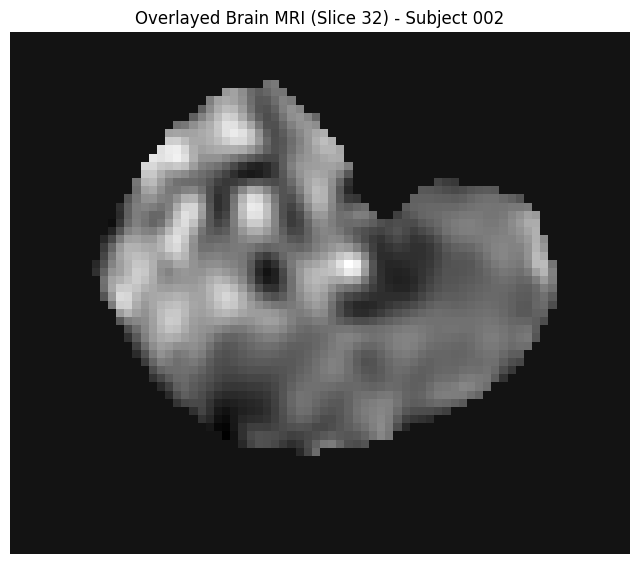

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

original_shape = brain_mask.shape

# Reconstruct the 3D volume by filling in the brain voxels in their original positions
reconstructed_volume = np.zeros(original_shape)
reconstructed_volume[brain_mask == 1] = overlay_data

# Visualize a middle slice along the Z-axis
slice_index = original_shape[2] // 2
plt.figure(figsize=(8, 8))
plt.imshow(reconstructed_volume[:, :, slice_index], cmap="gray")
plt.title(f"Overlayed Brain MRI (Slice {slice_index}) - Subject {subject_id}")
plt.axis("off")
plt.show()


### How does the high-dimensional nature of the MRI data relate to patient outcomes? 

MRI data is inherently high-dimensional, meaning that each scan is composed of thousands or even millions of voxels. Each voxel represents a tiny volume of the brain, and together they capture detailed information about brain structure and function. However, this richness comes with challenges:

Recall Curse of Dimensionality, with so many features (voxels) relative to the number of patients, predictive models can overfit and become computationally inefficient.

Principal Component Analysis (PCA) is a powerful technique to tackle these issues. PCA reduces the dimensionality of the MRI data by transforming the original high-dimensional voxel space into a smaller set of uncorrelated variables

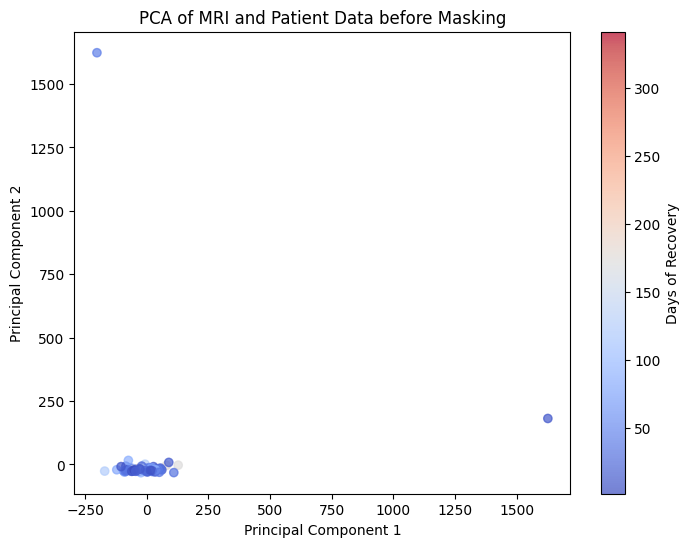

In [ ]:
import pandas as pd
import h5py
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_output.csv")

with h5py.File("cleaned_output.h5", "r") as h5file:
    mri_data = []
    subject_ids = []
    
    for subject_id in h5file.keys():
        image_array = h5file[subject_id]['image_array'][:]  # Load MRI data
        flattened_image = image_array.flatten()  # Convert 3D to 1D array
        
        mri_data.append(flattened_image)
        subject_ids.append(subject_id)  # Keep track of subject IDs

mri_data = np.array(mri_data)

mri_df = pd.DataFrame(mri_data)
mri_df["subject_id"] = subject_ids

# Merge CSV features with MRI data based on subject_id
df["subject_id"] = df["subject_id"].astype(str).str.zfill(3)  # Pad zeros (e.g., 3 → "003")
merged_df = df.merge(mri_df, on="subject_id", how="inner")

# Drop non-numeric columns before PCA
X = merged_df.drop(columns=["ID", "subject_id", "file_name", "shape"])  # Exclude non-numeric data

X.columns = X.columns.astype(str)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert PCA result to DataFrame
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Days of Recovery"] = merged_df["dRecov"]  # Retain recovery days for visualization

# Scatter Plot of PCA
plt.figure(figsize=(8,6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], c=pca_df["Days of Recovery"], cmap="coolwarm", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Days of Recovery")
plt.title("PCA of MRI and Patient Data before Masking")
plt.show()



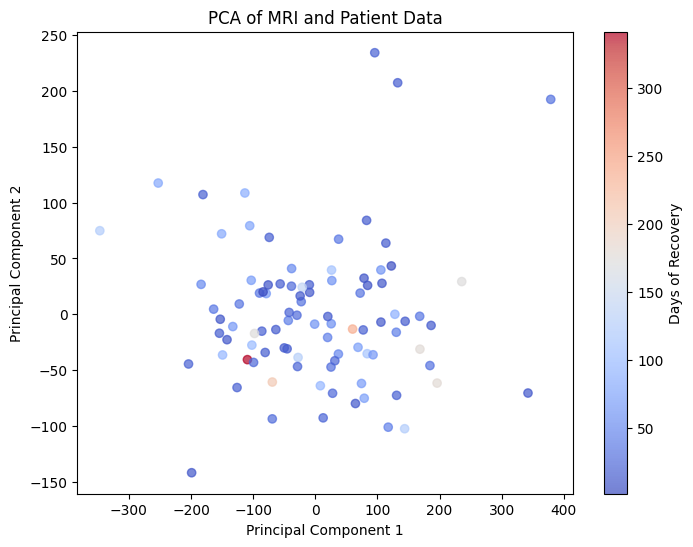

In [ ]:
df = pd.read_csv("cleaned_output.csv")

with h5py.File("25-brain_overlayed_new.h5", "r") as h5file:
    mri_data = []
    subject_ids = []
    
    for subject_id in h5file.keys():
        image_array = h5file[subject_id]['image_array'][:]  # Load MRI data
        flattened_image = image_array.flatten()  # Convert 3D to 1D array
        
        mri_data.append(flattened_image)
        subject_ids.append(subject_id)  # Keep track of subject IDs


mri_data = np.array(mri_data)


mri_df = pd.DataFrame(mri_data)
mri_df["subject_id"] = subject_ids

df["subject_id"] = df["subject_id"].astype(str).str.zfill(3)  # Pad zeros (e.g., 3 → "003")
merged_df = df.merge(mri_df, on="subject_id", how="inner")

X = merged_df.drop(columns=["ID", "subject_id", "file_name", "shape"])  # Exclude non-numeric data

X.columns = X.columns.astype(str)  

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert PCA result to DataFrame
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Days of Recovery"] = merged_df["dRecov"]  # Retain recovery days for visualization

# Scatter Plot of PCA
plt.figure(figsize=(8,6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], c=pca_df["Days of Recovery"], cmap="coolwarm", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Days of Recovery")
plt.title("PCA of MRI and Patient Data after Masking")
plt.show()

### Observation

1. **Before Masking (Top Plot)**  
   - **Clustering Near the Origin:** Most points cluster tightly around (0,0) in the principal component (PC) space, indicating limited variation among the majority of samples in the features used for PCA.  
   - **Extreme Outliers:** A small number of points lie far from the main cluster, suggesting that unmasked, high-intensity voxels (or large background regions) could dominate the variance. This can overshadow subtle brain-related features and distort the PCA.  
   - **Recovery Time Distribution:** The color bar indicates Days of Recovery, but because the points are mostly bunched together, it’s hard to discern any clear pattern of recovery time in relation to PC1 and PC2.

2. **After Masking (Bottom Plot)**  
   - **More Even Spread in PC Space:** The points now spread more uniformly across a wider range of PC1 and PC2. By removing non-brain regions, the PCA is more reflective of the actual brain tissue.  
   - **Reduced Extreme Outliers:** There are fewer points isolated far from the main distribution, indicating that the masking step reduced spurious variance from non-brain voxels as wanted

### Potential Explanations and Insights

1. **Impact of Masking:**  
   - **Before Masking:** The PCA was likely dominated by large background areas or out-of-brain intensities, causing most subjects to appear similar (near the origin) while a few outliers drastically shifted the variance.  
   - **After Masking:** By focusing only on voxels within the brain, PCA can pick up on subtle anatomical or intensity-based differences that may correlate more strongly with clinical variables like recovery time.

2. There’s no clear color pattern, it may suggest that simple linear projections (like PCA) are not strongly aligned with recovery time, and more sophisticated or non-linear methods might be needed.

For next step, we can investigate whether patients with very long recovery times cluster in a particular region of the PC space. This could inform hypotheses about specific brain regions or intensity patterns linked to prolonged recovery.
Use PCA Features in Modeling:

Also we can feed the top principal components (from the masked data) into a regression or neural network model. Compare performance to a baseline that uses raw or unmasked features.
Consider Non-Linear Methods:

If PCA doesn’t reveal strong patterns, we can try t-SNE, UMAP, or more specialized neuroimaging analyses (e.g., voxel-based morphometry or region-of-interest methods) in the modelling process.

## Take-aways

- There are no major issues with missing values or data alignment, ensuring a consistent foundation for analysis.
- Age: Concentrated in late teens to mid-twenties, indicating a relatively homogeneous cohort.
- Sex & HOC: Roughly balanced between categories (male/female, yes/no for concussion), which reduces class imbalance concerns.
- Recovery Time (dRecov): Right-skewed distribution, with a few outliers extending to high values (e.g., 300+ days).
- For MRI data, applying a brain mask removes non-brain regions, mitigating skew and outliers caused by large areas of zero or near-zero intensities.
- Dimensionality Reduction (PCA):
    - Pre-Masking: Dominated by outliers, leading to a tight cluster of most points and a few extreme cases.
    - Post-Masking: Points are more evenly distributed in principal component space, likely capturing more meaningful anatomical variation.
- Demographic features show little linear correlation with each other, reducing multicollinearity concerns. the pairplot confirms that sex, HOC, and days since injury do not exhibit strong linear patterns with age or each other.

## Questions to Explore Further in Modelling

   - Are there any systematic differences in MRI intensity distributions across subjects that might reflect scanner variability or preprocessing inconsistencies?



   - Does combining demographic features (age, sex, HOC) with imaging features improve the predictive power for recovery time?


   - Can we extract region-of-interest (ROI) features (e.g., from frontal or temporal lobes) that might have a stronger clinical relationship with recovery time?


   - What is the impact of using non-linear methods (t-SNE, UMAP) for visualization on our understanding of underlying patterns, and can these insights be translated into improved predictive features?


## Proposed Next Steps Plan


  - Conduct a detailed analysis of outlier subjects and determine whether they represent clinically relevant cases or data artifacts. Consider robust statistical techniques or transformation (e.g., log-transform for recovery time) to handle skewness.


 
  - Use atlas-based segmentation to extract specific brain regions. Compute summary statistics (mean, standard deviation) for each ROI and evaluate their relationship with recovery time.
  - Experiment with t-SNE or UMAP to visualize potential clusters in the MRI features. Identify if any clusters correspond to distinct clinical profiles (e.g., prolonged recovery).


- Develop baseline regression models (e.g., linear regression, Random Forest, XGBoost) using demographic data alone, MRI features alone, and combined features.
 
- Build CNN-based models for imaging data and compare performance when using raw versus masked data. Integrate imaging features with demographic data using fusion models.
.
